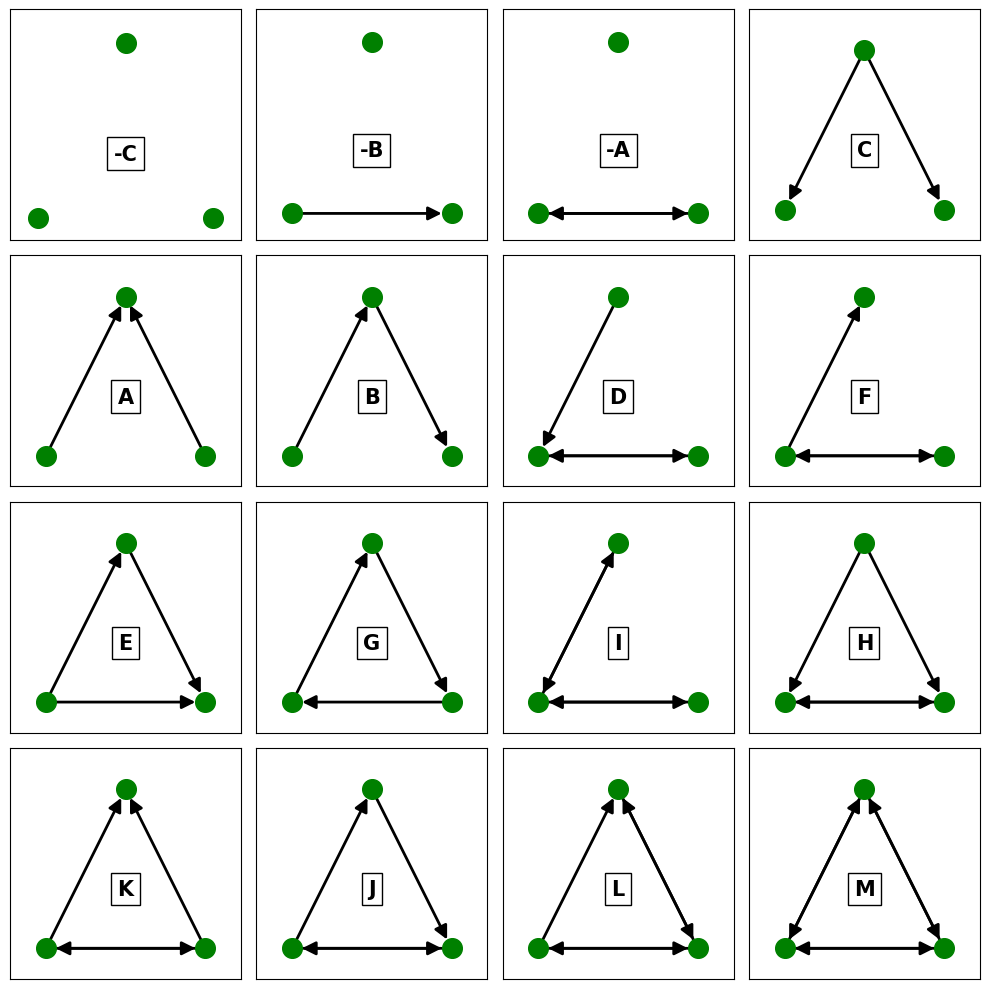

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from graph_analysis.triplets import MotifReader, CA1MotifCalculator

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
triads = {
    "003": [],
    "012": [(1, 2)],
    "102": [(1, 2), (2, 1)],
    "021D": [(3, 1), (3, 2)],
    "021U": [(1, 3), (2, 3)],
    "021C": [(1, 3), (3, 2)],
    "111D": [(1, 2), (2, 1), (3, 1)],
    "111U": [(1, 2), (2, 1), (1, 3)],
    "030T": [(1, 2), (3, 2), (1, 3)],
    "030C": [(1, 3), (3, 2), (2, 1)],
    "201": [(1, 2), (2, 1), (3, 1), (1, 3)],
    "120D": [(1, 2), (2, 1), (3, 1), (3, 2)],
    "120U": [(1, 2), (2, 1), (1, 3), (2, 3)],
    "120C": [(1, 2), (2, 1), (1, 3), (3, 2)],
    "210": [(1, 2), (2, 1), (1, 3), (3, 2), (2, 3)],
    "300": [(1, 2), (2, 1), (2, 3), (3, 2), (1, 3), (3, 1)],
}

for (title, triad), ax in zip(triads.items(), axes.flatten()):
    G = nx.DiGraph()
    G.add_nodes_from([1, 2, 3])
    G.add_edges_from(triad)
    nx.draw_networkx(
        G,
        ax=ax,
        with_labels=False,
        node_color=["green"],
        node_size=200,
        arrowsize=20,
        width=2,
        pos=nx.planar_layout(G),
    )
    ax.set_xlim(val * 1.2 for val in ax.get_xlim())
    ax.set_ylim(val * 1.2 for val in ax.get_ylim())
    cur_adj = nx.adjacency_matrix(G).A
    motif_reader = MotifReader()
    ascolin_name = None
    ascoli_name = motif_reader.matrix_to_name(cur_adj)
    idx = 0
    while not ascoli_name:
        print(f'{title} didnt work. Rotating 90 degrees the matrix:\n{cur_adj}')
        cur_adj = np.rot90(cur_adj)
        ascoli_name = motif_reader.matrix_to_name(cur_adj)
        idx+= 1
        if idx >2:
            break
    ax.text(
        0,
        0,
        ascoli_name,
        fontsize=15,
        fontweight="extra bold",
        horizontalalignment="center",
        bbox={"boxstyle": "square,pad=0.3", "fc": "none"},
    )
fig.tight_layout()
plt.show()

In [11]:
B_not_minusA = np.array([[0,0,0], 
                         [1,0,0], 
                         [0,1,0]])

In [14]:
B2 = np.array([[0,0,1], 
               [1,0,0], 
               [0,0,0]])

B3 = np.array([[0,0,1], 
               [0,0,0], 
               [0,1,0]])

In [10]:
import igraph

In [15]:
g_B1 = igraph.Graph.Adjacency(B_not_minusA)
g_B2 = igraph.Graph.Adjacency(B2)
g_B3 = igraph.Graph.Adjacency(B3)

In [17]:
g_B1.isomorphic(g_B2)

True

In [ ]:
def plot_motif(motif_matrix,**kwargs):
    fig, ax = plt.subplots(1,1,**kwargs)
    G = nx.from_numpy_array(motif_matrix, create_using=nx.DiGraph())
    nx.draw_networkx(
        G,
        ax=ax,
        with_labels=False,
        node_color=["green"],
        node_size=200,
        arrowsize=20,
        width=2,
        pos=nx.planar_layout(G),
    )
    ax.set_xlim(val * 1.2 for val in ax.get_xlim())
    ax.set_ylim(val * 1.2 for val in ax.get_ylim())
    ascoli_name = motif_reader.matrix_to_name(cur_adj)
    ax.text(
        0,
        0,
        ascoli_name,
        fontsize=15,
        fontweight="extra bold",
        horizontalalignment="center",
        bbox={"boxstyle": "square,pad=0.3", "fc": "none"},
    )
    return fig,ax

/gpfs/bbp.cscs.ch/home/kurban/venv2022/lib/python3.8/site-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


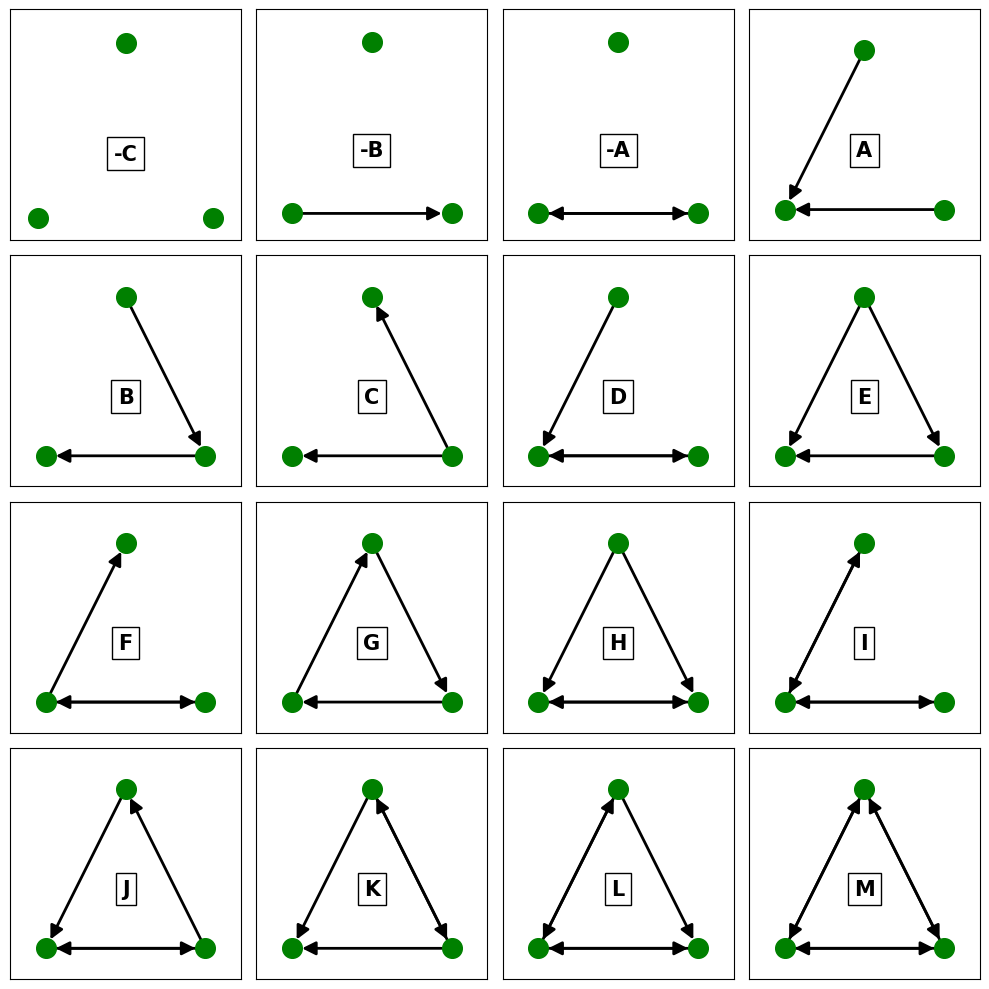

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from graph_analysis.triplets import MotifReader, CA1MotifCalculator

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
motif_reader = MotifReader()

for motif, ax in zip(motif_reader.motifs, axes.flatten()):
    title = motif['name']
    adj_matrix = motif['matrix']
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph())
    nx.draw_networkx(
        G,
        ax=ax,
        with_labels=False,
        node_color=["green"],
        node_size=200,
        arrowsize=20,
        width=2,
        pos=nx.planar_layout(G),
    )
    ax.set_xlim(val * 1.2 for val in ax.get_xlim())
    ax.set_ylim(val * 1.2 for val in ax.get_ylim())
    cur_adj = nx.adjacency_matrix(G).A
    ascoli_name = motif_reader.matrix_to_name(cur_adj)
    ax.text(
        0,
        0,
        ascoli_name,
        fontsize=15,
        fontweight="extra bold",
        horizontalalignment="center",
        bbox={"boxstyle": "square,pad=0.3", "fc": "none"},
    )
fig.tight_layout()
plt.show()

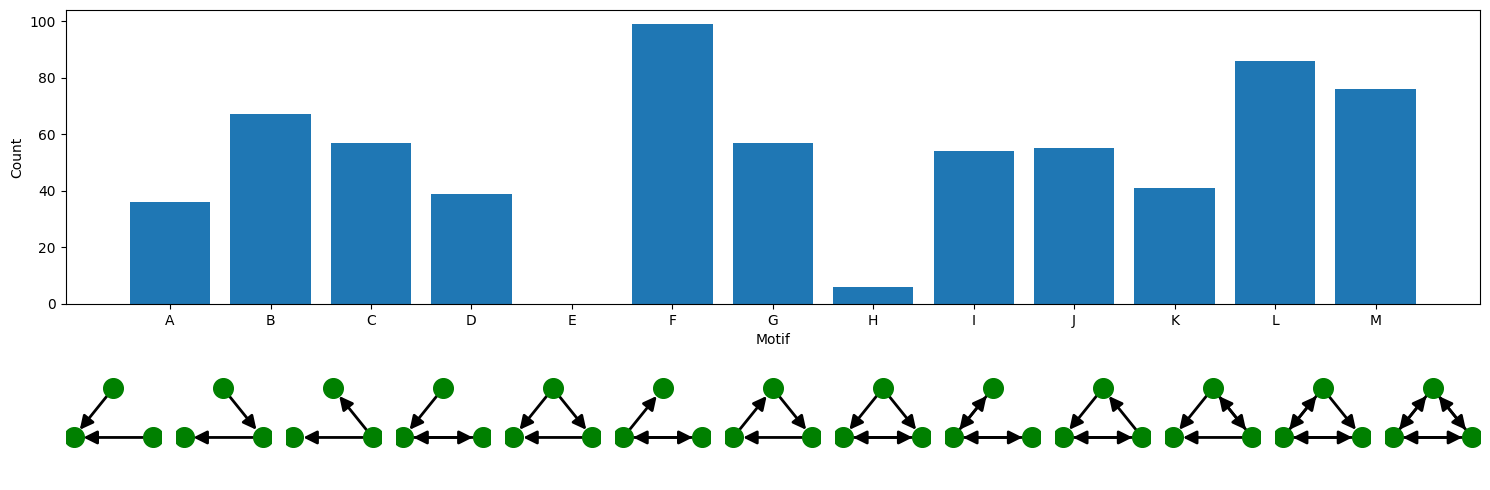

In [34]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
import networkx as nx

chosen_df = pd.DataFrame({
    'motif': list('ABCDEFGHIJKLM'),
    'count': np.random.randint(0, 100, size=13)
})

fig = plt.figure(figsize=(15, 5))  # Adjust the figure size
gs = GridSpec(3, len(chosen_df), figure=fig)

# Create the bar plot in the first two rows
ax1 = fig.add_subplot(gs[:2, :])
ax1.bar(np.arange(len(chosen_df['motif'])) + 0.5, chosen_df['count'])  # Add padding to the x-coordinates
ax1.set_xticks(np.arange(len(chosen_df['motif'])) + 0.5)  # Set the x-ticks to the center of the bars
ax1.set_xticklabels(chosen_df['motif'])  # Set the x-tick labels
ax1.set_xlabel('Motif')
ax1.set_ylabel('Count')

# Create a subplot for each motif in the third row
motif_reader = MotifReader()
for i, motif_name in enumerate(chosen_df['motif']):
    motif_matrix = motif_reader.name_to_matrix(motif_name)
    ax = fig.add_subplot(gs[2, i])
    G = nx.from_numpy_array(motif_matrix, create_using=nx.DiGraph())
    nx.draw_networkx(
        G,
        ax=ax,
        with_labels=False,
        node_color=["green"],
        node_size=200,
        arrowsize=20,
        width=2,
        pos=nx.planar_layout(G),  # Use spring_layout to center the nodes
    )
    ax.set_xlim(-1.2, 1.2)  # Adjust the x-limits
    ax.set_ylim(-1.2, 1.2)  # Adjust the y-limits
    ax.axis('off')

plt.tight_layout()
plt.show()
